# Title:  **DRUG PREDICTION**
## Author: **Muhammad Bilal**

***Greetings!*** 

In this notebook, I will build a model to predict which drug might be appropriate for a patient with the same illness, based on some features in the dataset. 

## **Import Libraries**

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report


## **Load Dataset**

In [3]:
# import data
data = pd.read_csv('drug.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## **Exploratory Data Analysis (EDA)**

In [4]:
# Exploring the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## **Missing values**

In [5]:
# check for missing values
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## **Visulization**

<Axes: xlabel='BP', ylabel='count'>

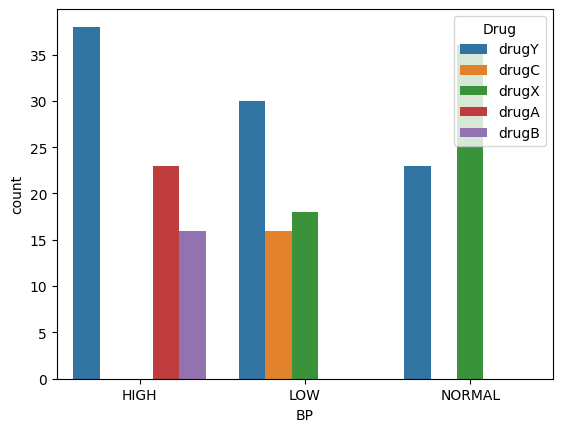

In [6]:
#visulization
sns.countplot(data=data, x='BP', hue="Drug")

**Comment :**

The chart indicate how different medications are distributed among patients with varying blood pressure levels. Patients with normal BP are likely to respond to drugY and drugX. Those with high BP respond to drugY, drugA and drugB. Last but not least, patients having low BP react to drugY, drugC and drugX.


<Axes: xlabel='Age', ylabel='Na_to_K'>

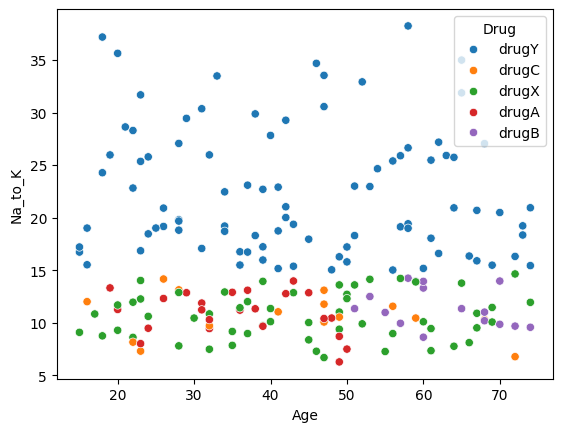

In [7]:
sns.scatterplot(data=data, x="Age", y="Na_to_K", hue="Drug")

**Comment** :

The visualization serves to explore the relationship between Na-to-K ratio and types of drugs prescribed. The difference is clearly shown. Patients with Na-to-K ratio over 15 tend to respond only to drugY, and those with the ratio under 15 are likely to comply with other medications.

<Axes: xlabel='Cholesterol', ylabel='count'>

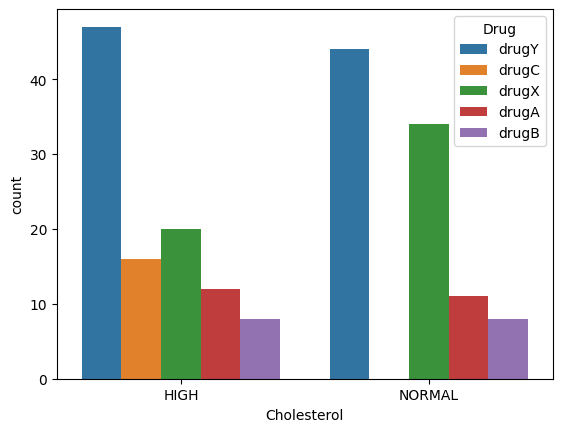

In [8]:
sns.countplot(data=data, x="Cholesterol", hue="Drug")


**Comment** :

The bar chart shows the distribution of drug types across different cholesterol levels. It appears that drugY is prescribed acorss all cholesterol levels, whereas other drugs are more restricted. DrugC is likely not to be prescribed to patients with normal cholesterol level. 

## Predictive Model

In [9]:
# Let's encode the Sex in label encoder with sklearn
le = LabelEncoder()
label_sex = le.fit_transform(data["Sex"])

In [10]:
# drop old columns and replace new ones
data.drop("Sex", axis=1, inplace=True)
data['Sex'] = label_sex

list(le.classes_)
#F = 0     #M = 1

['F', 'M']

In [11]:
# Let's encode the BP in label encoder with sklearn
label_BP = le.fit_transform(data["BP"])

# drop old columns and replace new ones
data.drop("BP", axis=1, inplace=True)
data['BP'] = label_BP

list(le.classes_)
#HIGH = 0       #LOW = 1       #NORMAL = 2

['HIGH', 'LOW', 'NORMAL']

In [12]:
# Let's encode the Cholesterol in label encoder with sklearn
label_chol = le.fit_transform(data["Cholesterol"])

# drop old columns and replace new ones
data.drop("Cholesterol", axis=1, inplace=True)
data['Cholesterol'] = label_chol

list(le.classes_)
#HIGH = 0    #NORMAL = 1

['HIGH', 'NORMAL']

In [13]:
data.head()

,Age,Na_to_K,Drug,Sex,BP,Cholesterol
0,23,25.355,drugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,drugY,0,1,0


### **Model Training**

In [14]:
# Split the data into X and y column
X = data.drop("Drug", axis=1)
y = data["Drug"]

In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Predict the model
y_pred = model.predict(X_test)

In [18]:
# check the feature names
X.columns

Index(['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol'], dtype='object')

In [19]:
model.feature_importances_

array([0.13551008, 0.49326063, 0.        , 0.2656578 , 0.1055715 ])

In [20]:
# sorted to keep it in order as it appears in the dataset
sorted(data["Drug"].unique())

['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]\nclass = drugY'),
 Text(0.5, 0.7, 'BP <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]\nclass = drugX'),
 Text(0.25, 0.5, 'Age <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]\nclass = drugA'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]\nclass = drugB'),
 Text(0.75, 0.5, 'BP <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]\nclass = drugX'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]\nclass = drugX'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]\nclass = drugX'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]\nclass = drugX'),
 Text(0.75, 0.7, 'gini = 0.0\nsam

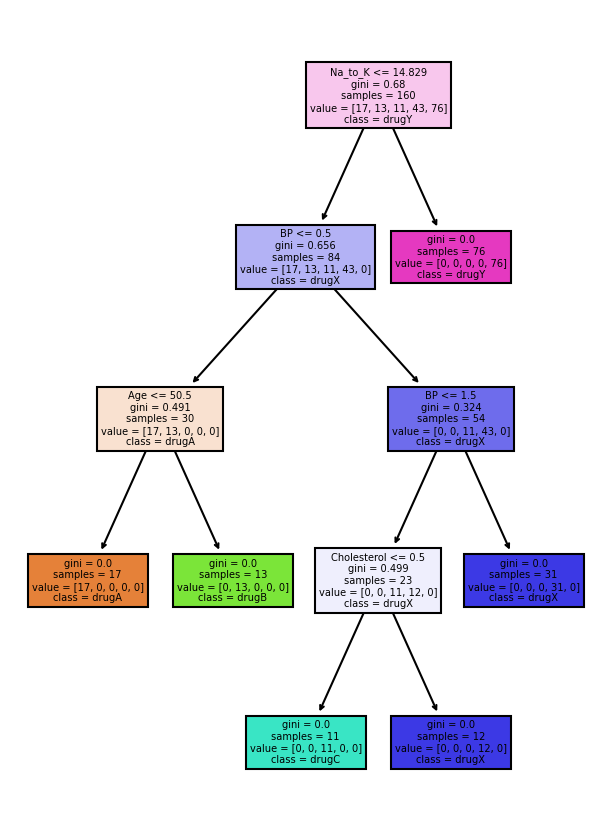

In [21]:
plt.figure(figsize=(5, 7), dpi=150)
plot_tree(model, feature_names = X.columns, class_names=sorted(data["Drug"].unique()), filled=True)

**Comment-4 :**

From the tree, patients with Na-to-K ratio over 14.839 respond to drugY. Those with the ratio inferior or equal to 14.839 are taken into consideration with other features. 

Patients having Na-to-K ratio inferior or equal to 14.839, high level of BP (or BP = 0) and age under 53 years old react to drugA. Those satisfying the same conditions but having age over 53 years old react to drugB.

## **Model Evaluation**

In [22]:
# Evaluate the model
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred, average="weighted"))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))
print("classification_report\n", classification_report(y_test,y_pred))

accuracy_score:  1.0
recall_score:  1.0
confusion_matrix
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
classification_report
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [23]:
data.head()

,Age,Na_to_K,Drug,Sex,BP,Cholesterol
0,23,25.355,drugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,drugY,0,1,0


In [25]:
# Prediction for user input
age = int(input("Enter age: "))
na_to_k = float(input("Enter sodium-potassium ratio (Na_to_K): "))
sex = input("Enter sex ( (1) M/ (0) F): ")
bp = input("Enter blood pressure ( (0) HIGH/ (1) LOW/ (2) NORMAL): ")
cholesterol = input("Enter cholesterol level ( (0) HIGH/ (1) NORMAL): ")
prediction = model.predict([[age, na_to_k, sex, bp,cholesterol]])
print('-'*35)
print('Predicted class is : ', prediction)
print('-'*35)

-----------------------------------
Predicted class is :  ['drugY']
-----------------------------------


c:\Users\Bilal\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Conclusion

The Decision Tree model helps visualize the distribution of drug types across multiple features. It has a certainty rate of 96.67%, which is quite positive for a predictive model. I hope that this model can be an useful resource in the domain of healthcare or pharmaceutical.